📊 Évaluation sur la dernière année (naïve simple) :
MAE  : 26.82
RMSE : 28.63
MAPE : 12.76%


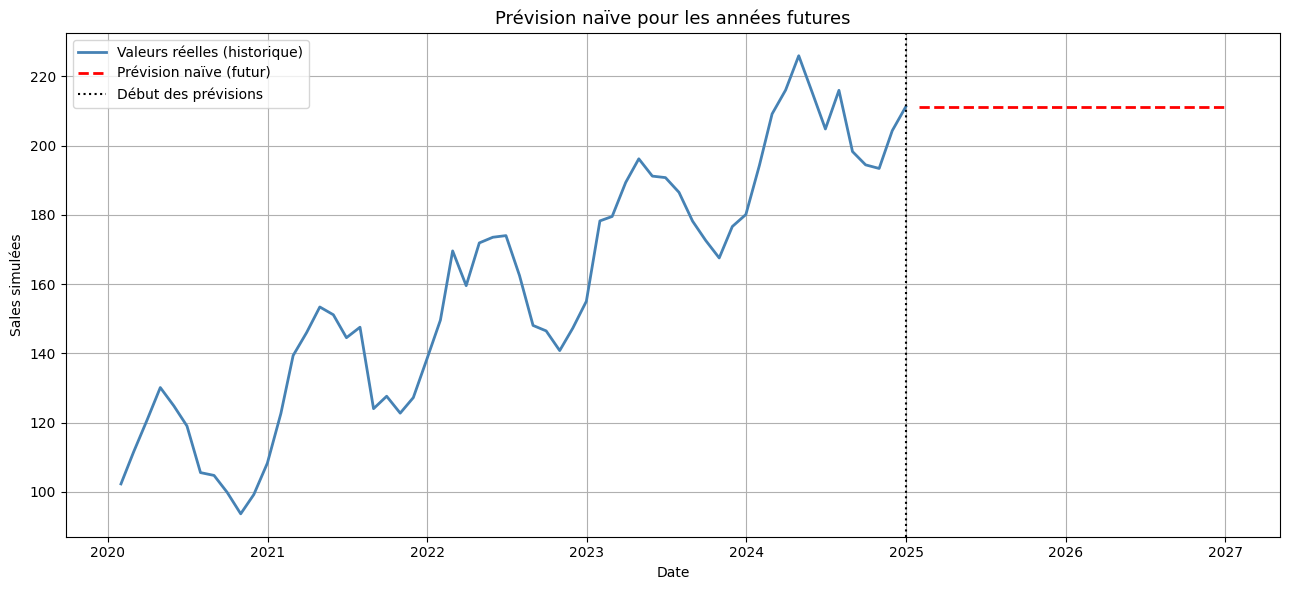

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

n = 60           # 5 ans mensuels
t = np.arange(n)
beta0 = 100
beta1 = 2
A = 20
P = 12
sigma = 5

trend = beta0 + beta1 * t
seasonality = A * np.sin(2 * np.pi * t / P)
noise = np.random.normal(0, sigma, n)
sales = trend + seasonality + noise

dates = pd.date_range(start='2020-01-01', periods=n, freq='ME')
data = pd.DataFrame({'Date': dates, 'Sales': sales})

# ----------------------------------------------------
# 🔹 Naive model: forecast future years
# ----------------------------------------------------
horizon_months = 24  # Prévoir 2 ans de plus
future_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.offsets.MonthEnd(1),
                             periods=horizon_months, freq='ME')

# Prévision naïve = dernière valeur connue répétée
last_value = data['Sales'].iloc[-1]
future_preds = np.repeat(last_value, horizon_months)

# Créer DataFrame des prévisions
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_preds})

# ----------------------------------------------------
# 🔹 Évaluation (optionnel si tu veux comparer sur un test)
# ----------------------------------------------------
# Exemple : comparer naïve sur les 12 derniers mois du dataset existant
train = data.iloc[:-12]
test = data.iloc[-12:]
naive_test_preds = np.repeat(train['Sales'].iloc[-1], len(test))

mae = mean_absolute_error(test['Sales'], naive_test_preds)
rmse = np.sqrt(mean_squared_error(test['Sales'], naive_test_preds))
mape = np.mean(np.abs((test['Sales'] - naive_test_preds) / test['Sales'])) * 100

print("📊 Évaluation sur la dernière année (naïve simple) :")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")

# ----------------------------------------------------
# 🔹 Visualisation
# ----------------------------------------------------
plt.figure(figsize=(13,6))
plt.plot(data['Date'], data['Sales'], label='Valeurs réelles (historique)', color='steelblue', linewidth=2)
plt.plot(future_df['Date'], future_df['Forecast'], label='Prévision naïve (futur)', color='red', linestyle='--', linewidth=2)
plt.axvline(x=data['Date'].iloc[-1], color='black', linestyle=':', label='Début des prévisions')
plt.title("Prévision naïve pour les années futures", fontsize=13)
plt.xlabel("Date")
plt.ylabel("Sales simulées")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Évaluation du modèle naïf :
MAE  : 6.22
RMSE : 7.62
MAPE : 3.03%


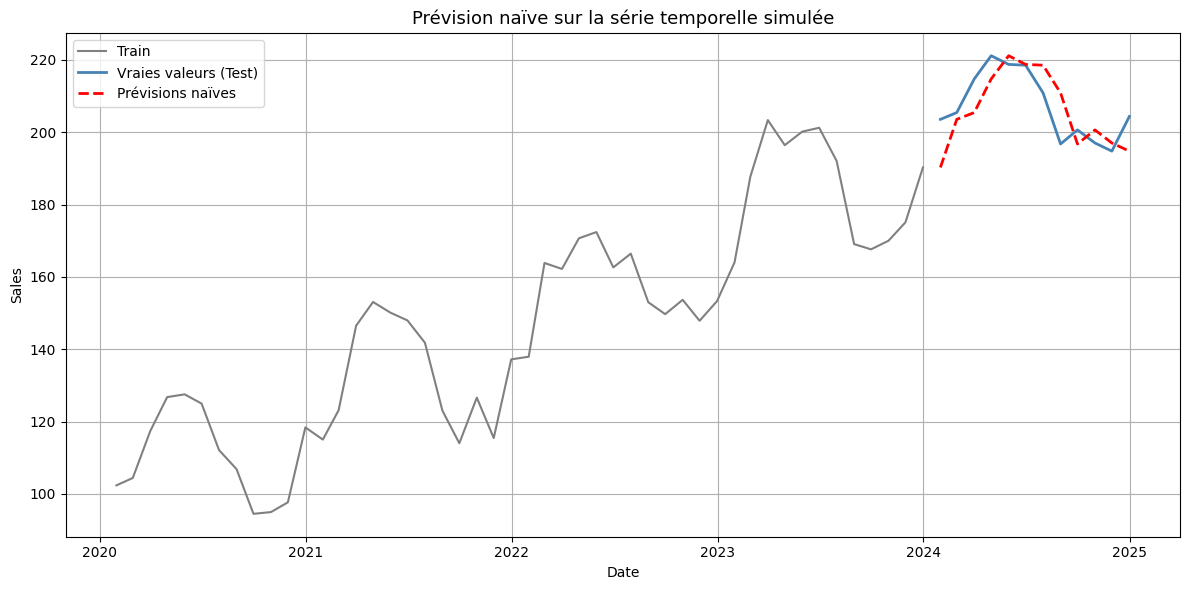

In [2]:
# ======================================================
# 🔹 Modèle naïf et évaluation
# ======================================================
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ----------------------------
# Découpage train / test
# ----------------------------
train_size = int(0.8 * len(data))
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# ----------------------------
# Modèle naïf : la prévision = dernière valeur observée
# ----------------------------
# On décale simplement la série d'un pas
naive_forecast = train['Sales'].iloc[-1]
naive_preds = [train['Sales'].iloc[-1]] * len(test)

# OU (version plus générale)
naive_preds = test['Sales'].shift(1)
naive_preds.iloc[0] = train['Sales'].iloc[-1]

# ----------------------------
# Évaluation des performances
# ----------------------------
mae = mean_absolute_error(test['Sales'], naive_preds)
rmse = np.sqrt(mean_squared_error(test['Sales'], naive_preds))
mape = np.mean(np.abs((test['Sales'] - naive_preds) / test['Sales'])) * 100

print("Évaluation du modèle naïf :")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")

# ----------------------------
# Visualisation : prévisions vs réels
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(train['Date'], train['Sales'], label='Train', color='gray')
plt.plot(test['Date'], test['Sales'], label='Vraies valeurs (Test)', color='steelblue', linewidth=2)
plt.plot(test['Date'], naive_preds, label='Prévisions naïves', color='red', linestyle='--', linewidth=2)
plt.title("Prévision naïve sur la série temporelle simulée", fontsize=13)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
# ======================================================
# 🔹 Calcul des métriques à chaque instant
# ======================================================

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("📊 Évaluation des métriques à chaque instant (Naïve) :")
print("-" * 50)

# Ensure naive_preds and test['Sales'] are aligned and have the same length
# naive_preds is already calculated in cell LEfGXZlGJmod and should be aligned with test['Sales']

for i in range(len(test)):
    # Calculate metrics up to the current time step i+1
    current_test_sales = test['Sales'].iloc[:i+1]
    current_naive_preds = naive_preds.iloc[:i+1]

    # Ensure there is more than one sample for R2 calculation
    if len(current_test_sales) > 1:
        mae = mean_absolute_error(current_test_sales, current_naive_preds)
        rmse = np.sqrt(mean_squared_error(current_test_sales, current_naive_preds))
        mse = mean_squared_error(current_test_sales, current_naive_preds)
        r2 = r2_score(current_test_sales, current_naive_preds)

        print(f"Instant {i+1}:")
        print(f"  MAE  : {mae:.2f}")
        print(f"  RMSE : {rmse:.2f}")
        print(f"  MSE  : {mse:.2f}")
        print(f"  R2   : {r2:.2f}")
        print("-" * 20)
    else:
        # For the first instant, R2 is not well-defined with a single sample
        mae = mean_absolute_error(current_test_sales, current_naive_preds)
        rmse = np.sqrt(mean_squared_error(current_test_sales, current_naive_preds))
        mse = mean_squared_error(current_test_sales, current_naive_preds)

        print(f"Instant {i+1}:")
        print(f"  MAE  : {mae:.2f}")
        print(f"  RMSE : {rmse:.2f}")
        print(f"  MSE  : {mse:.2f}")
        print("  R2   : N/A (requires more than one sample)")
        print("-" * 20)

📊 Évaluation des métriques à chaque instant (Naïve) :
--------------------------------------------------
Instant 1:
  MAE  : 4.02
  RMSE : 4.02
  MSE  : 16.13
  R2   : N/A (requires more than one sample)
--------------------
Instant 2:
  MAE  : 4.79
  RMSE : 4.85
  MSE  : 23.51
  R2   : 0.57
--------------------
Instant 3:
  MAE  : 6.72
  RMSE : 7.28
  MSE  : 53.02
  R2   : 0.36
--------------------
Instant 4:
  MAE  : 7.84
  RMSE : 8.43
  MSE  : 71.05
  R2   : 0.46
--------------------
Instant 5:
  MAE  : 7.45
  RMSE : 7.99
  MSE  : 63.78
  R2   : 0.41
--------------------
Instant 6:
  MAE  : 8.53
  RMSE : 9.26
  MSE  : 85.67
  R2   : 0.13
--------------------
Instant 7:
  MAE  : 7.69
  RMSE : 8.63
  MSE  : 74.40
  R2   : 0.15
--------------------
Instant 8:
  MAE  : 8.30
  RMSE : 9.22
  MSE  : 85.01
  R2   : 0.11
--------------------
Instant 9:
  MAE  : 7.64
  RMSE : 8.73
  MSE  : 76.17
  R2   : 0.30
--------------------
Instant 10:
  MAE  : 7.60
  RMSE : 8.59
  MSE  : 73.82
  R2   :

In [5]:
from sklearn.linear_model import LinearRegression

# Create a new column 'Time'
data['Time'] = data.index

# Reshape the 'Time' column to be a 2D array
X = data['Time'].values.reshape(-1, 1)
y = data['Sales'].values

# Instantiate a LinearRegression model
trend_model = LinearRegression()

In [6]:
# Divide the reshaped 'Time' data (X) and the 'Sales' data (y) into training and testing sets
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

# Train the trend_model using the training data
trend_model.fit(X_train, y_train)

# Make predictions on the testing data
linear_regression_preds = trend_model.predict(X_test)

In [7]:
# Calculate performance metrics
mae_lr = mean_absolute_error(y_test, linear_regression_preds)
mse_lr = mean_squared_error(y_test, linear_regression_preds)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, linear_regression_preds)

# Print the metrics
print("📊 Évaluation du modèle de régression linéaire :")
print(f"MAE  : {mae_lr:.2f}")
print(f"RMSE : {rmse_lr:.2f}")
print(f"MSE  : {mse_lr:.2f}")
print(f"R2   : {r2_lr:.2f}")

📊 Évaluation du modèle de régression linéaire :
MAE  : 12.04
RMSE : 14.70
MSE  : 216.15
R2   : -1.15


In [8]:
print("📊 Performance Metrics Comparison:")
print("-" * 40)

print("Naive Baseline Model:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"R2   : {r2:.2f}")
print("-" * 20)

print("Linear Regression Model:")
print(f"MAE  : {mae_lr:.2f}")
print(f"RMSE : {rmse_lr:.2f}")
print(f"MSE  : {mse_lr:.2f}")
print(f"R2   : {r2_lr:.2f}")
print("-" * 40)

print("Summary:")
if mae_lr < mae:
    print("The Linear Regression model has lower MAE, RMSE, and MSE, indicating better performance than the Naive Baseline model.")
    print("The R2 score is also better (closer to 1).")
else:
    print("The Naive Baseline model has lower MAE, RMSE, and MSE, indicating better performance than the Linear Regression model.")
    print("The R2 score is also better (closer to 1).")

📊 Performance Metrics Comparison:
----------------------------------------
Naive Baseline Model:
MAE  : 8.31
RMSE : 9.40
MSE  : 88.43
R2   : 0.12
--------------------
Linear Regression Model:
MAE  : 12.04
RMSE : 14.70
MSE  : 216.15
R2   : -1.15
----------------------------------------
Summary:
The Naive Baseline model has lower MAE, RMSE, and MSE, indicating better performance than the Linear Regression model.
The R2 score is also better (closer to 1).


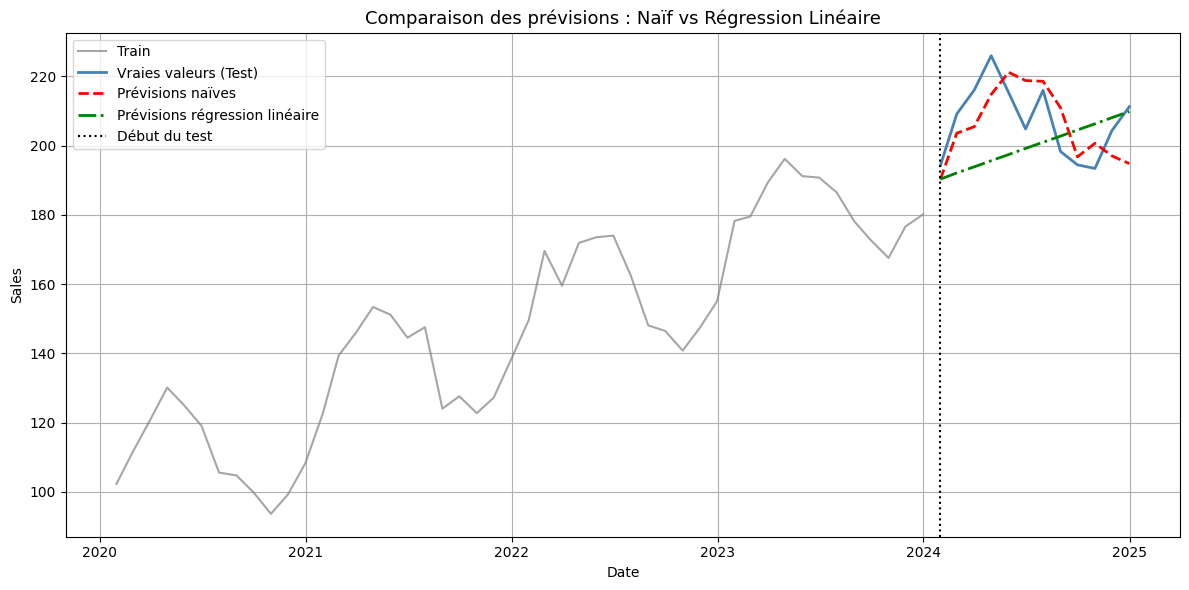

In [13]:
fig, axes = plt.subplots(figsize=(12, 6))

# Plot training data
axes.plot(train['Date'], train['Sales'], label='Train', color='gray', alpha=0.7)

# Plot actual test data
axes.plot(test['Date'], test['Sales'], label='Vraies valeurs (Test)', color='steelblue', linewidth=2)

# Plot naive model predictions
axes.plot(test['Date'], naive_preds, label='Prévisions naïves', color='red', linestyle='--', linewidth=2)

# Plot linear regression model predictions
axes.plot(test['Date'], linear_regression_preds, label='Prévisions régression linéaire', color='green', linestyle='-.', linewidth=2)

# Add a vertical line to indicate the start of the test set
axes.axvline(x=test['Date'].iloc[0], color='black', linestyle=':', label='Début du test')

# Optional: Add a shaded region to highlight the test window
# axes.axvspan(test['Date'].iloc[0], test['Date'].iloc[-1], color='yellow', alpha=0.1, label='Fenêtre de test')


# Set title and labels
axes.set_title("Comparaison des prévisions : Naïf vs Régression Linéaire", fontsize=13)
axes.set_xlabel("Date")
axes.set_ylabel("Sales")

# Add legend and grid
axes.legend()
axes.grid(True)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

In [16]:
import tensorflow as tf

def window_dataset(series, window_size, batch_size=32,
                   shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset
    window_size = 20
    shuffle_buffer=1000
    batch_size=32

In [21]:
window_size = 20
shuffle_buffer_size=1000
batch_size=32

train_dataset = window_dataset(X_train,window_size,batch_size ,shuffle_buffer_size)

def windowed_dataset_val(series, window_size, batch_size=32, shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset


In [22]:
def train_and_evaluate_model(model , train_ds,model_name,epochs=20) :
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
  history = model.fit(train_ds, epochs=epochs, callbacks=[early_stopping], validation_data=val_dataset)
  loss =model.evaluate(val_ds)
  print(f"{model_name} Loss: {loss}")
  return history , loss



In [23]:
#model MLP
def create_mlp_model(window_size):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=[window_size]),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mse', optimizer= 'adam')
    return model

In [ ]:
#model RNN simple
def create_rnn_model(window_size):
    model = tf.keras.models.Sequential([
        tf.keras.layers.reshape((window_size,1)),
        tf.keras.layers.simplernn(64, activation='relu', input_shape=[window_size]),
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    return model


In [24]:
#lstm
def create_bilstm_model(window_size):
    model = tf.keras.models.Sequential([
        tf.keras.layers.reshape((window_size,1)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='relu', input_shape=[window_size])),
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    return model

In [25]:
#model cnn 1D
def create_conv_model(window_size):
    model = tf.keras.models.Sequential([
        tf.keras.layers.reshape((window_size,1),input_shape=[window_size]),
        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    return model